# EDA for Telcom Churn Analysis

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


In [2]:
telco_df = pd.read_csv ('Telco-Customer-Churn.csv')

In [3]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco_df.shape

(7043, 21)

In [5]:
telco_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Senior Citizen is categorical, with binary numbers. 

75% customers have tenure less than 55 months 

Average monthly charges are 64.76 dollars, whereas 25% customers pay more than $89.85 per month

Text(0.5, 1.0, 'Count of Churn Variable')

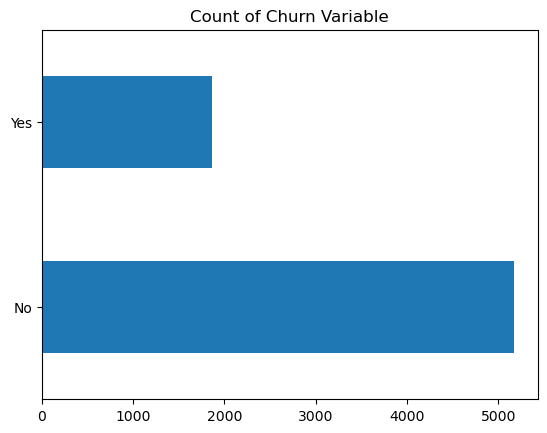

In [7]:
telco_df['Churn'].value_counts().plot(kind = 'barh')
plt.title("Count of Churn Variable")

In [8]:
telco_df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Data is imbalanced, so we'll separate the Churn variable (target variable)

## Data Cleaning ##

In [9]:
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')
print(telco_df['TotalCharges'].dtypes)
telco_df.isnull().sum()
#11 columns with missinng values

float64


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
telco_df.loc[telco_df['TotalCharges'].isnull() == True]
telco_df.dropna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [11]:
# changing the tenure month range to years
print(telco_df['tenure'].max())  #72

72


In [12]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_df['tenure_yrs'] = pd.cut(telco_df.tenure, range(1, 80, 12), right=False, labels=labels)


In [13]:
telco_df['tenure_yrs'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_yrs, dtype: int64

In [14]:
#didn't think customerID was important

telco_df.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_yrs
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


Last Step is to one hot encode categorical variables 

In [15]:
telco_df['Churn'] = telco_df['Churn'].replace({'Yes': 1, 'No': 0})
telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_yrs
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [32]:

telco_df_OHE = pd.get_dummies(telco_df)
telco_df_OHE.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_yrs_1 - 12,tenure_yrs_13 - 24,tenure_yrs_25 - 36,tenure_yrs_37 - 48,tenure_yrs_49 - 60,tenure_yrs_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


## Data Exploration

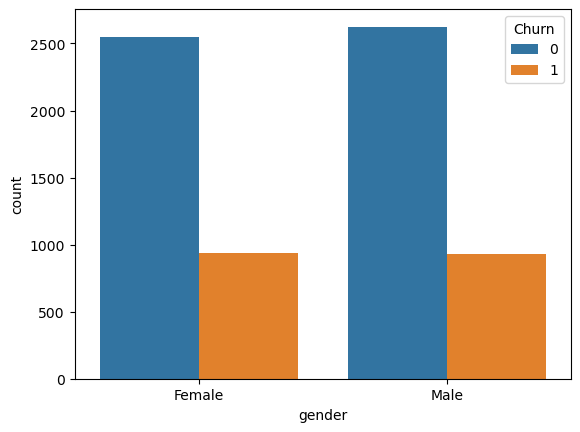

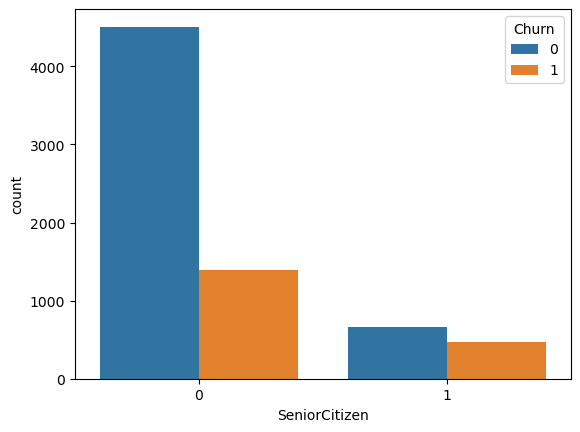

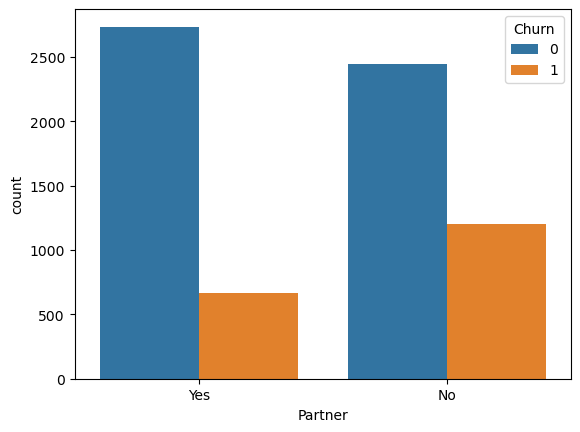

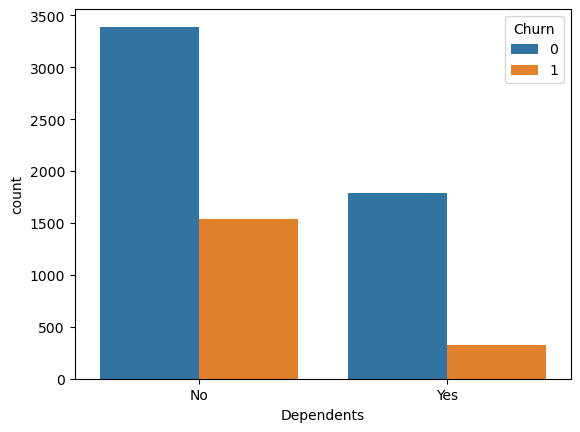

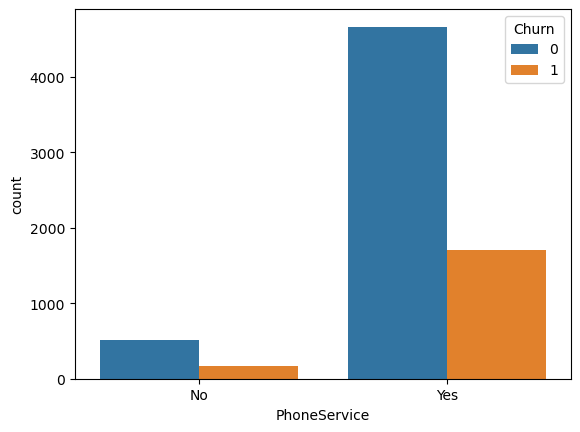

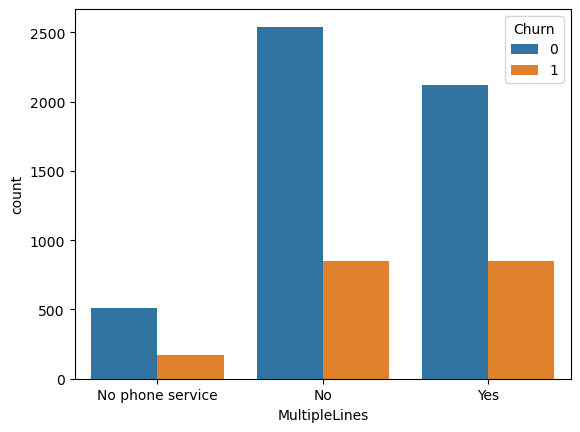

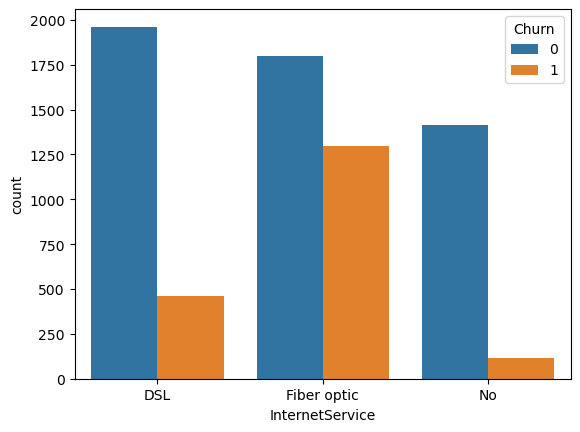

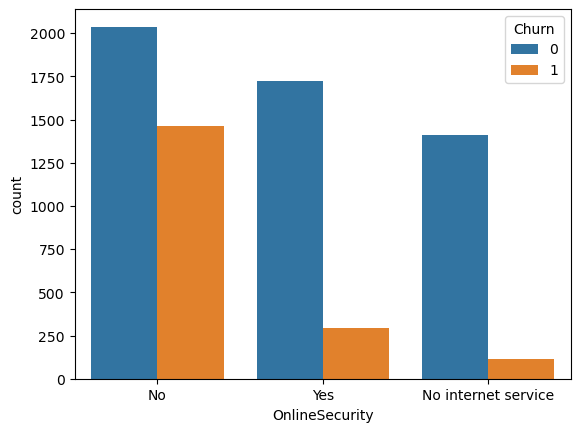

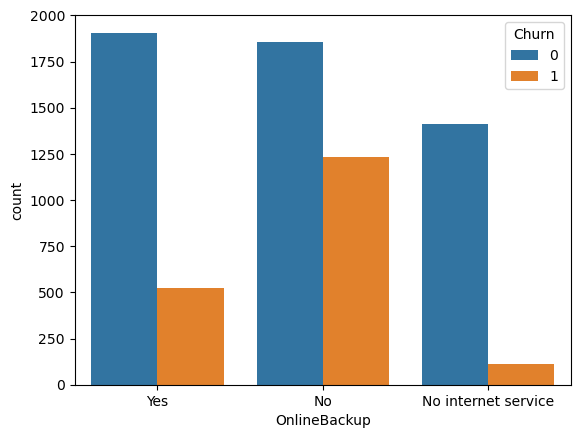

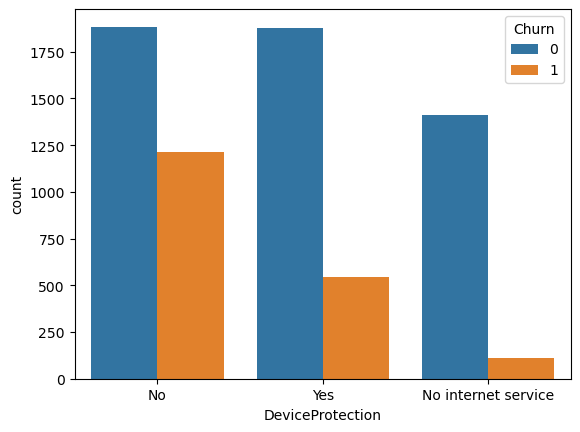

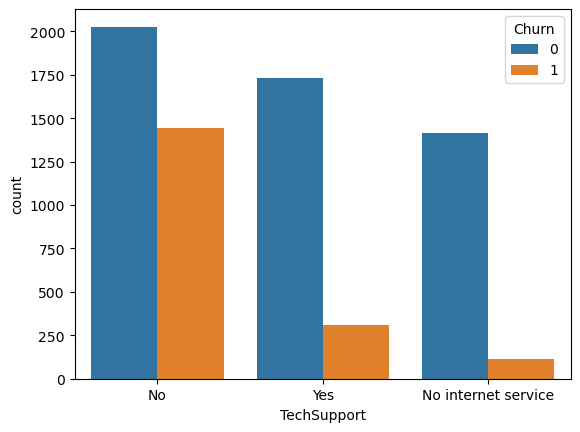

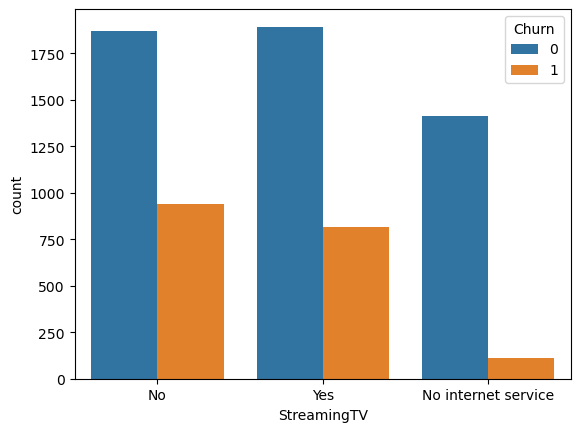

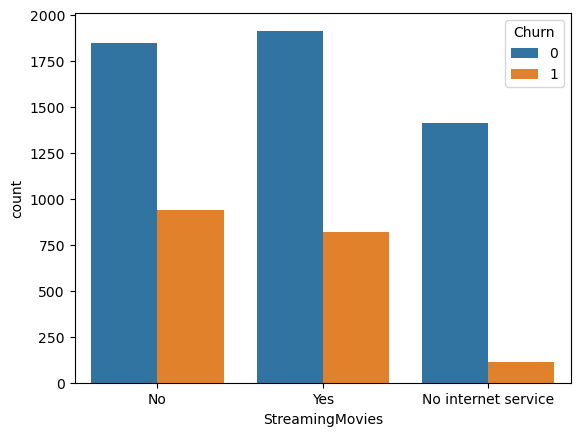

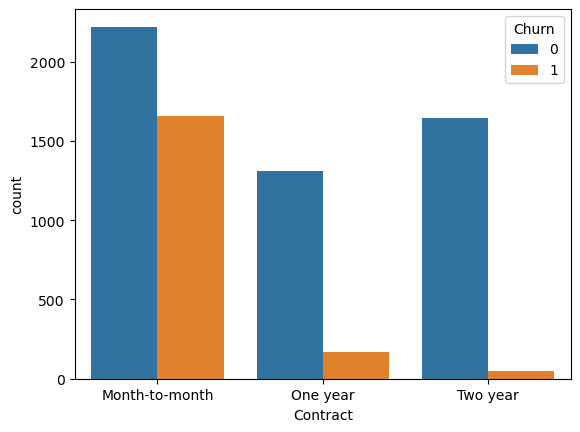

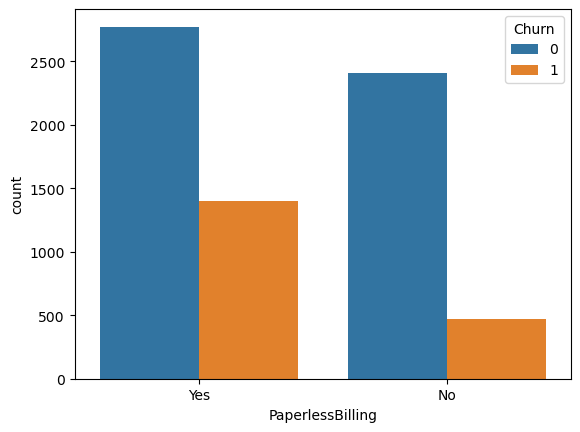

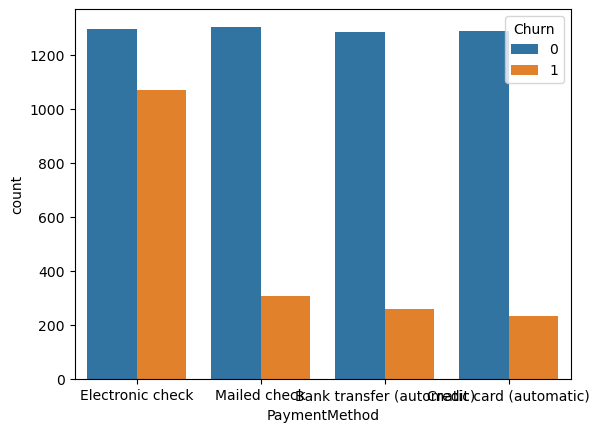

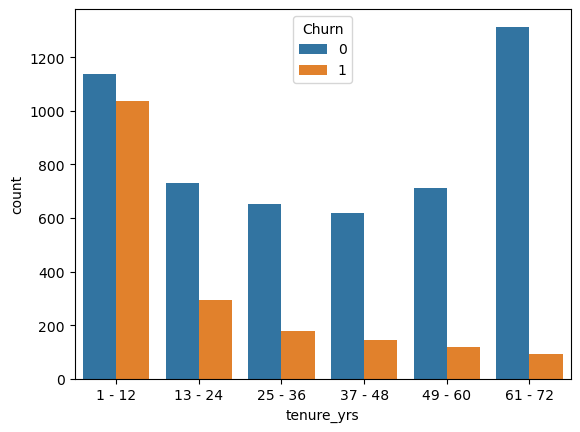

In [17]:
for i, predictor in enumerate(telco_df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_df, x=predictor, hue='Churn')

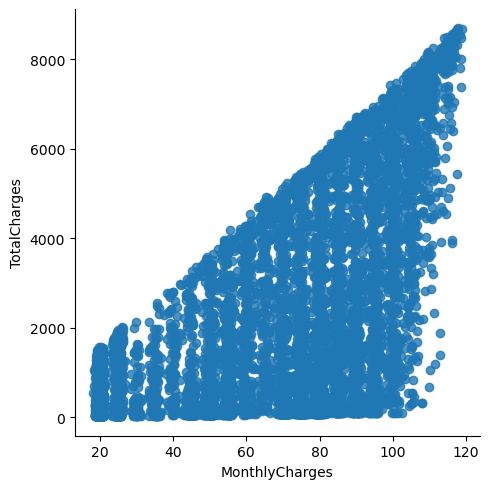

In [33]:
# Monthly charge vs Total Charge
sns.lmplot(data=telco_df_OHE, x='MonthlyCharges', y='TotalCharges', fit_reg=False)
# Positive Correlation

/var/folders/5b/2g77hpks0f1gpbsbg7c0kt840000gn/T/ipykernel_64315/1711818267.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Month = sns.kdeplot(telco_df_OHE.MonthlyCharges[(telco_df_OHE["Churn"] == 0) ],
/var/folders/5b/2g77hpks0f1gpbsbg7c0kt840000gn/T/ipykernel_64315/1711818267.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Month = sns.kdeplot(telco_df_dummies.MonthlyCharges[(telco_df_OHE["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

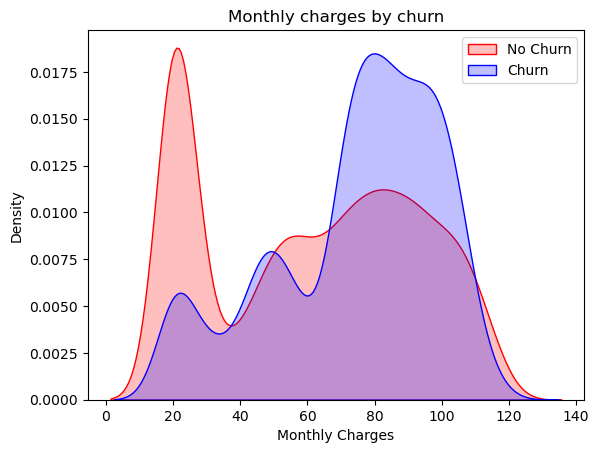

In [36]:
# Churn by monthly and total charges
Month = sns.kdeplot(telco_df_OHE.MonthlyCharges[(telco_df_OHE["Churn"] == 0) ],
                color="Red", shade = True)
Month = sns.kdeplot(telco_df_dummies.MonthlyCharges[(telco_df_OHE["Churn"] == 1) ],
                ax = Month, color="Blue", shade= True)
Month.legend(["No Churn","Churn"])
Month.set_ylabel('Density')
Month.set_xlabel('Monthly Charges')
Month.set_title('Monthly charges by churn')

/var/folders/5b/2g77hpks0f1gpbsbg7c0kt840000gn/T/ipykernel_64315/1164917209.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Month = sns.kdeplot(telco_df_OHE.TotalCharges[(telco_df_OHE["Churn"] == 0) ],
/var/folders/5b/2g77hpks0f1gpbsbg7c0kt840000gn/T/ipykernel_64315/1164917209.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Month = sns.kdeplot(telco_df_dummies.TotalCharges[(telco_df_OHE["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

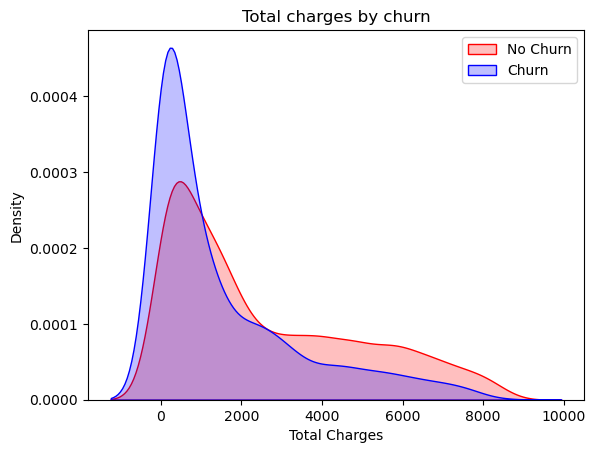

In [37]:
Month = sns.kdeplot(telco_df_OHE.TotalCharges[(telco_df_OHE["Churn"] == 0) ],
                color="Red", shade = True)
Month = sns.kdeplot(telco_df_dummies.TotalCharges[(telco_df_OHE["Churn"] == 1) ],
                ax = Month, color="Blue", shade= True)
Month.legend(["No Churn","Churn"])
Month.set_ylabel('Density')
Month.set_xlabel('Total Charges')
Month.set_title('Total charges by churn')

Churn is high when Monthly Charges are high

Higher Churn at lower Total Charges

Therefore, if we combine the insights of Tenure, Monthly Charges & Total Charges than we can see Higher Monthly Charges at lower tenure results into lower Total Charge. Hence, all these 3 factors vizualize Higher Monthly Charge, Lower tenure and Lower Total Charge are linked to High Churn.

<Axes: >

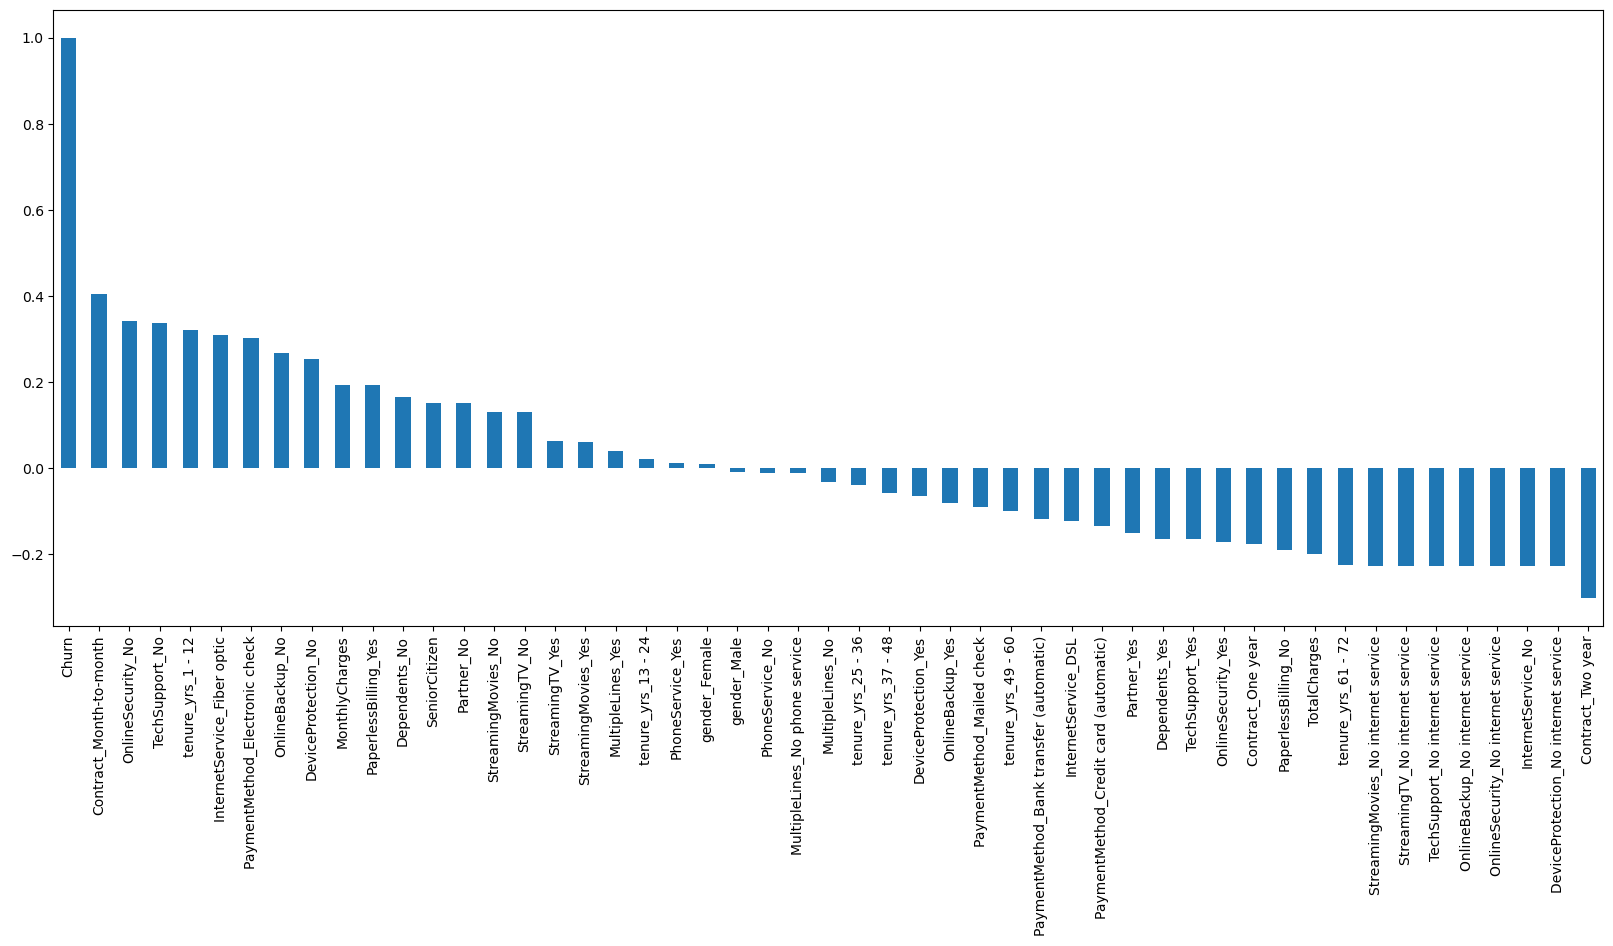

In [38]:
plt.figure(figsize=(20,8))
telco_df_OHE.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn



## Separate Analysis

In [46]:
# separate datafram for Churn and No Churn
telco_df0 = telco_df.loc[telco_df["Churn"]==0]
telco_df1 = target1=telco_df.loc[telco_df["Churn"]==1]

In [72]:
def uniplot(df, col, title, hue=None, style='darkgrid', palette= 'colorblind'):
    sns.set_style(style)
    sns.set_context('paper')

    plt.title(title)
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette = palette)
    
    plt.show()


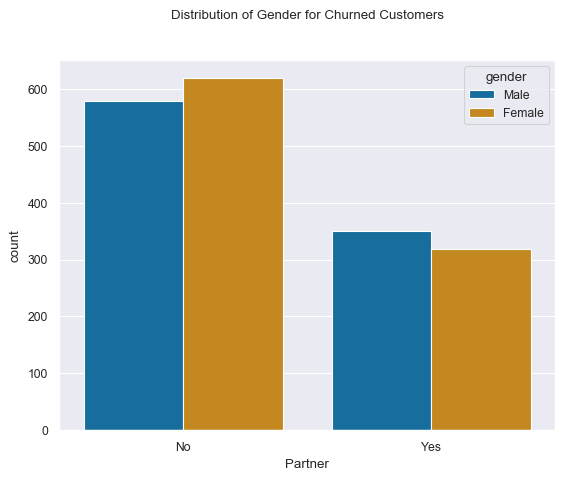

In [73]:
uniplot(telco_df1, col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')


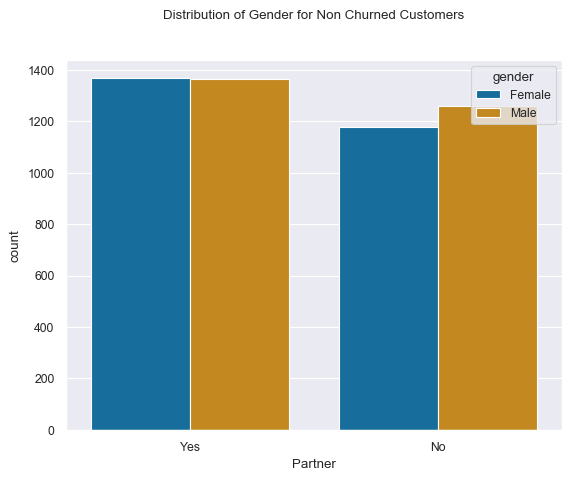

In [74]:
uniplot(telco_df0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')


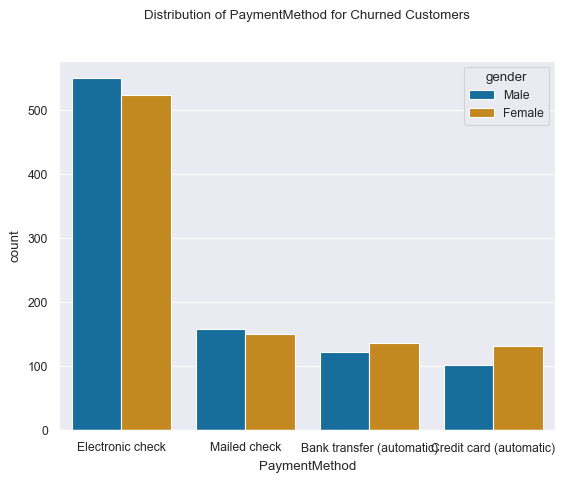

In [76]:
uniplot(telco_df1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')


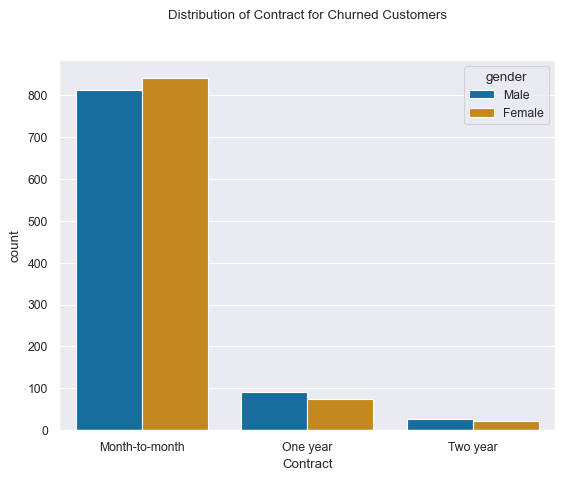

In [77]:
uniplot(telco_df1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')


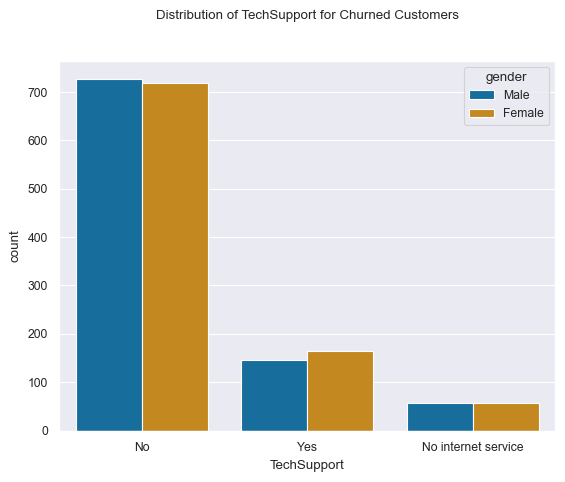

In [78]:
uniplot(telco_df1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')


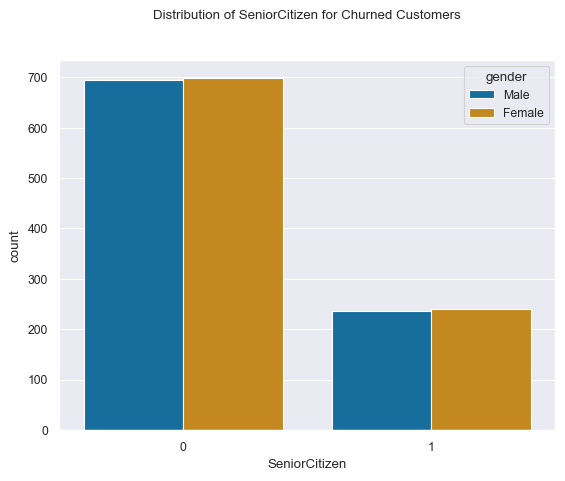

In [75]:
uniplot(telco_df1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')


### Analysis
- Electronic check medium are the highest churners
- Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
- No Online security, No Tech Support category are high churners
- Non senior Citizens are high churners